In [17]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns

import functions.eddy_feedback as ef

In [18]:
# directory_path = Path('/home/links/ct715/data_storage/PAMIP/processed_monthly/efp_pd_non-regridded')

# # Initialize an empty list to store the model names
# model_names = []
# # Iterate through the files in the directory
# for file in directory_path.iterdir():
#     if file.is_file() and file.suffix == ".nc":
#         # Extract the stem (filename without extension)
#         filename_stem = file.stem
#         # Split by underscore and take the first part (MODEL)
#         model_name = filename_stem.split('_')[0]
#         # Append the model name to the list
#         model_names.append(model_name)
        
# # sort the models alphabetically
# model_names.sort()
# model_names.remove('E3SMv1')
# model_names.remove('ECHAM6.3')
# # model_names

# ds_models = {}
# for model in model_names:
    
#     # set file directory
#     file_dir = directory_path.glob(f'{model}*.nc')
#     # import data
#     dataset = xr.open_mfdataset(
#         file_dir,
#         parallel=True
#     )
    
#     # subset data
#     dataset = dataset.where(dataset.level < 1000.)
#     dataset = dataset.where(dataset.lat < 90.)
    
#     # save to dictionary
#     ds_models[model] = dataset
    
# # del ds_models['E3SMv1']
# # del ds_models['ECHAM6.3']
# len(ds_models)

# model_efp_res = {}
# for model in model_names:
    
#     # calculate EFP
#     efp_nh = ef.calculate_efp(ds_models[model], data_type='pamip')
#     efp_sh = ef.calculate_efp(ds_models[model], data_type='pamip', calc_south_hemis=True)
    
#     # calculate each model res
#     resolution = abs(ds_models[model].lat[0] - ds_models[model].lat[1])
    
#     model_efp_res[model] = (resolution.values.item(), efp_nh, efp_sh)
    
# # del model_efp_res['CESM1-WACCM-SC']
# # del model_efp_res['CanESM5']
# # del model_efp_res['NorESM2-LM']

In [19]:
# efp = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/non-regridded_efp_AWI-fabricated.csv', index_col=0)
# res = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots/data/pamip_resolutions.csv')

# efp_res = efp.merge(res, on='model')

# # fabricate and add MIROC into the dataframe
# efp_res.loc[11] = ['MIROC6', 0.1592, 0.2058, 1.4, 81]
# efp_res = efp_res.sort_values(by='model').reset_index(drop=True)

# efp_res.to_csv('/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots/data/pamip_efp+res_all-fabricated.csv', index=False)

In [20]:
efp_res = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots/data/pamip_efp+res_all-fabricated.csv')
efp_res

,model,efp_nh,efp_sh,lat_res,pres_levels
0,AWI-CM-1-1-MR,0.3724,0.4354,0.940,95
1,CESM1-WACCM-SC,0.1297,0.0295,1.900,66
2,CESM2,0.3693,0.3419,1.250,32
3,CNRM-CM6-1,0.2421,0.2082,1.000,91
4,CanESM5,0.4256,0.4618,2.800,49
5,E3SMv1,0.0543,0.0542,1.000,72
6,EC-EARTH3,0.2945,0.3135,1.000,91
7,FGOALS-f3-L,0.2354,0.1274,1.000,32
8,HadGEM3-GC31-LL,0.2730,0.2951,1.250,85
9,HadGEM3-GC31-MM,0.3137,0.3002,0.550,85


# Seaborn plot

Watch out for incorrect resolution with OpenIFS-511!!

### Drop some models, if required

In [21]:
# efp_res = efp_res.drop(index=0) # drop CESM1
# efp_res = efp_res.drop(index=3) # drop CanESM5
# efp_res = efp_res.drop(index=10) # drop NorESM2
# efp_res = efp_res.drop(index=12) # drop OpenIFS-511
efp_res

,model,efp_nh,efp_sh,lat_res,pres_levels
0,AWI-CM-1-1-MR,0.3724,0.4354,0.940,95
1,CESM1-WACCM-SC,0.1297,0.0295,1.900,66
2,CESM2,0.3693,0.3419,1.250,32
3,CNRM-CM6-1,0.2421,0.2082,1.000,91
4,CanESM5,0.4256,0.4618,2.800,49
5,E3SMv1,0.0543,0.0542,1.000,72
6,EC-EARTH3,0.2945,0.3135,1.000,91
7,FGOALS-f3-L,0.2354,0.1274,1.000,32
8,HadGEM3-GC31-LL,0.2730,0.2951,1.250,85
9,HadGEM3-GC31-MM,0.3137,0.3002,0.550,85


# Both Hemispheres

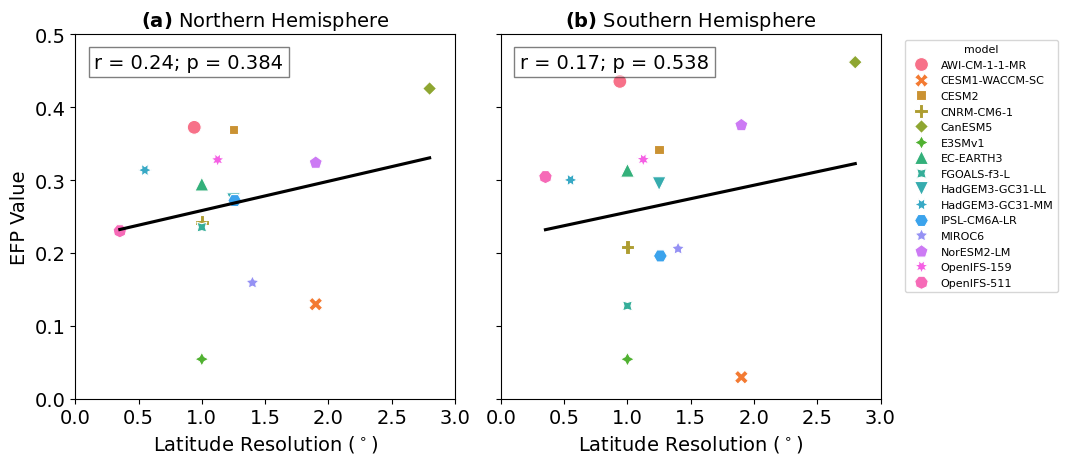

In [24]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

# Function to compute and add Pearson correlation
def add_correlation(ax, x, y):
    corr, p_val = pearsonr(x, y)
    ax.text(0.05, 0.95, f"r = {corr:.2f}; p = {p_val:.3f}", transform=ax.transAxes, 
            fontsize=14, verticalalignment="top", bbox=dict(facecolor="white", alpha=0.5))

# First plot: NH EFP vs. lat_res
sns.scatterplot(
    x=efp_res["lat_res"], 
    y=efp_res["efp_nh"], 
    hue=efp_res["model"], 
    style=efp_res["model"], 
    ax=axes[0], 
    s=100
)
sns.regplot(
    x=efp_res["lat_res"], 
    y=efp_res["efp_nh"], 
    scatter=False, 
    ax=axes[0], 
    color="black", 
    ci=None
)
axes[0].set_title("$\\bf{(a)}$ Northern Hemisphere", fontsize=14)
axes[0].set_xlabel("Latitude Resolution ($^\\circ$)", fontsize=14)
axes[0].set_ylabel("EFP Value", fontsize=14)
axes[0].set_xlim(0,3)
axes[0].set_ylim(0,0.5)
axes[0].tick_params(labelsize=14)
axes[0].get_legend().remove()
add_correlation(axes[0], efp_res["lat_res"], efp_res["efp_nh"])

# Second plot: SH EFP vs. lat_res
sns.scatterplot(
    x=efp_res["lat_res"], 
    y=efp_res["efp_sh"], 
    hue=efp_res["model"], 
    style=efp_res["model"], 
    ax=axes[1], 
    s=100
)
sns.regplot(
    x=efp_res["lat_res"], 
    y=efp_res["efp_sh"], 
    scatter=False, 
    ax=axes[1], 
    color="black", 
    ci=None
)
axes[1].set_title("$\\bf{(b)}$ Southern Hemisphere", fontsize=14)
axes[1].set_xlabel("Latitude Resolution ($^\\circ$)", fontsize=14)
axes[1].set_xlim(0,3)
axes[1].set_ylim(0,0.5)
axes[1].tick_params(labelsize=14)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8, 
               title='model', title_fontsize=8)
add_correlation(axes[1], efp_res["lat_res"], efp_res["efp_sh"])

# Suptitle slightly left-aligned
# fig.suptitle("PAMIP EFP Values vs model Resolution", fontsize=16, x=0.4)

plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Leave space for legend and suptitle
plt.show()


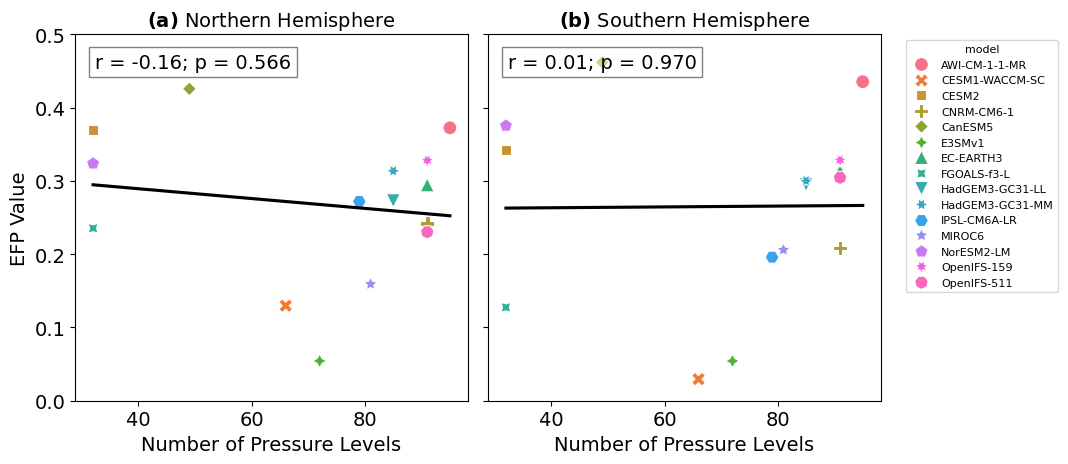

In [28]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

# Function to compute and add Pearson correlation
def add_correlation(ax, x, y):
    corr, p_val = pearsonr(x, y)
    ax.text(0.05, 0.95, f"r = {corr:.2f}; p = {p_val:.3f}", transform=ax.transAxes, 
            fontsize=14, verticalalignment="top", bbox=dict(facecolor="white", alpha=0.5))

# First plot: NH EFP vs. pres_levels
sns.scatterplot(
    x=efp_res["pres_levels"], 
    y=efp_res["efp_nh"], 
    hue=efp_res["model"], 
    style=efp_res["model"], 
    ax=axes[0], 
    s=100
)
sns.regplot(
    x=efp_res["pres_levels"], 
    y=efp_res["efp_nh"], 
    scatter=False, 
    ax=axes[0], 
    color="black", 
    ci=None
)
axes[0].set_title("$\\bf{(a)}$ Northern Hemisphere", fontsize=14)
axes[0].set_xlabel("Number of Pressure Levels", fontsize=14)
axes[0].set_ylabel("EFP Value", fontsize=14)
# axes[0].set_xlim(0,3)
axes[0].set_ylim(0,0.5)
axes[0].tick_params(labelsize=14)
axes[0].get_legend().remove()
add_correlation(axes[0], efp_res["pres_levels"], efp_res["efp_nh"])

# Second plot: SH EFP vs. pres_levels
sns.scatterplot(
    x=efp_res["pres_levels"], 
    y=efp_res["efp_sh"], 
    hue=efp_res["model"], 
    style=efp_res["model"], 
    ax=axes[1], 
    s=100
)
sns.regplot(
    x=efp_res["pres_levels"], 
    y=efp_res["efp_sh"], 
    scatter=False, 
    ax=axes[1], 
    color="black", 
    ci=None
)
axes[1].set_title("$\\bf{(b)}$ Southern Hemisphere", fontsize=14)
axes[1].set_xlabel("Number of Pressure Levels", fontsize=14)
# axes[1].set_xlim(0,3)
axes[1].set_ylim(0,0.5)
axes[1].tick_params(labelsize=14)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8, 
               title='model', title_fontsize=8)
add_correlation(axes[1], efp_res["pres_levels"], efp_res["efp_sh"])

# Suptitle slightly left-aligned
# fig.suptitle("PAMIP EFP Values vs model Resolution", fontsize=16, x=0.4)

plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Leave space for legend and suptitle
plt.show()
